In [1]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
#import shap
import numpy as np



In [2]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [3]:
data = pd.read_csv('Datasets/Eureca_Adapted.csv', header=0,low_memory=False)
data

,IDENTIFICADOR,source,type,assessment_date,gender,age,ethnicity,EST_CIV,children,tabacco_act,...,TPH1_Intron9,TPH1_T8687,TPH2_8997,TPH2_9000_Eco72_1,TPH2_9000_Aci_I,TPH2_Intron5,TPH2_Exon7,TPH2_Intron9,MAOA_Promo,MAOA_promo_activite
0,1,0,12,10/1/2007,0,45.4620123203285,1,2,1,1,...,,,,AA,GG,,GG,,2 3,B H
1,2,1,7,11/26/2002,1,44,4,,1,,...,,,,AA,,,AG,,2,H
2,3,0,12,6/4/2008,1,49.138945927447,1,2,1,0,...,,,,AA,GG,,GG,,2,H
3,4,0,12,1/29/2010,0,37.1225188227242,1,2,1,1,...,,,,,,,,,,
4,5,2,11,6/5/2006,1,34,1,3,,,...,,,,,,,,,2,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,8691,1,5,3/7/2001,1,35,1,1,,0,...,,,AA,TA,GG,,AG,,2,H
8691,8692,1,5,5/4/2000,0,20,1,1,,1,...,,,,TA,GG,,AA,,1 2,B H
8692,8693,1,7,5/24/2000,0,33,1,3,0,0,...,,,AA,AA,GG,,GG,,1 2,B H
8693,8694,1,7,,0,20,1,,,1,...,ct,,AA,AA,GG,TC,AG,AA,1 2,B H


In [4]:
df = data.copy()
df.replace(' ', np.nan, inplace=True)

# Deleting records where any specified columns have empty strings ('')
names_list = [
    "BDNF_valmet",
    "COMT",
    "HT1A",
    "HT1B_161",
    "HT1B_861",
    "VHT2A_1438",
    "VHT2A_C102T",
    "VHTTP_mutation_seule",
    "VHTTP_LPR",
    "@_httpb_promoteur",
    "VHTTP_snippassocie",
    "VHTTP_Intron2",
    "TPH1_intron1b",
    "TPH1_promo",
    "TPH1_Intron3",
    "TPH1_Intron4",
    "TPH1_Intron7",
    "TPH1_Intron9",
    "TPH1_T8687",
    "TPH2_8997",
    "TPH2_9000_Eco72_1",
    "TPH2_9000_Aci_I",
    "TPH2_Intron5",
    "TPH2_Exon7",
    "TPH2_Intron9",
    "MAOA_Promo",
    "MAOA_promo_activite"
]

# Count NaN values for each row in the specified columns
nan_counts = df[names_list].isnull().sum(axis=1)

# Filter rows with more than 6 NaN values
rows_to_drop = nan_counts[nan_counts > 8].index #70% of 26 genes is 18.2

# Store the number of records to be dropped
num_records_dropped = len(rows_to_drop)

# Drop rows from the DataFrame
df.drop(rows_to_drop, inplace=True)

# Print the number of records dropped
print(f"{num_records_dropped} records were dropped.")
print(f"{len(df)} remaining")

6579 records were dropped.
2116 remaining


In [5]:
len(df)

2116

In [6]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")




Column 'IDENTIFICADOR' has 0 null value(s).
Column 'source' has 0 null value(s).
Column 'type' has 0 null value(s).
Column 'assessment_date' has 509 null value(s).
Column 'gender' has 0 null value(s).
Column 'age' has 4 null value(s).
Column 'ethnicity' has 5 null value(s).
Column 'EST_CIV' has 936 null value(s).
Column 'children' has 1157 null value(s).
Column 'tabacco_act' has 871 null value(s).
Column 'niv_edu' has 1034 null value(s).
Column 'sit_lab' has 999 null value(s).
Column 'his_fam_suicide_behavior' has 920 null value(s).
Column 'his_fam_suicide' has 958 null value(s).
Column 'his_fam_suicide_attempt' has 1068 null value(s).
Column 'Suicidal_behavior' has 285 null value(s).
Column 'num_suic_attempts' has 321 null value(s).
Column 'age_first_attempt' has 818 null value(s).
Column 'day_int' has 1359 null value(s).
Column 'month_int' has 1288 null value(s).
Column 'year_int' has 1202 null value(s).
Column 'violent_suicide_attempt' has 769 null value(s).
Column 'suicide' has 990

In [7]:
df_genes = df.copy()
null_counts = df_genes.isnull().sum()
columns_to_drop = null_counts[null_counts > 870].index
df_genes = df_genes.drop(columns=columns_to_drop)

print("DataFrame after dropping columns:")
print(df_genes.columns)

DataFrame after dropping columns:
Index(['IDENTIFICADOR', 'source', 'type', 'assessment_date', 'gender', 'age',
       'ethnicity', 'Suicidal_behavior', 'num_suic_attempts',
       'age_first_attempt', 'violent_suicide_attempt', 'tm', 'dd_depre',
       'dd_bipolar', 'dd_sz', 'dd_psychotic', 'dd_cyclothymic', 'dd_dysthymic',
       'dd_al_drug', 'dd_oh', 'dd_substance', 'dd_nbsubstances', 'BDNF_valmet',
       'COMT', 'HT1A', 'HT1B_161', 'HT1B_861', 'VHTTP_mutation_seule',
       'VHTTP_LPR', '@_httpb_promoteur', 'VHTTP_snippassocie', 'TPH1_promo',
       'TPH1_Intron4', 'TPH1_Intron7', 'TPH2_8997', 'TPH2_9000_Eco72_1',
       'TPH2_9000_Aci_I', 'TPH2_Intron5', 'TPH2_Exon7', 'TPH2_Intron9',
       'MAOA_Promo', 'MAOA_promo_activite'],
      dtype='object')


In [8]:
# indices_to_drop = [45:72, 79:116, 120:146, 150:193, 199:274]
# df.drop(df.columns[indices_to_drop], axis=1, inplace=True)

# print(df)

indices_to_drop = ['gender', 'age','ethnicity','Suicidal_behavior','num_suic_attempts','tm','dd_depre','dd_bipolar','dd_sz', 'dd_psychotic',
                   'dd_al_drug','dd_oh','dd_nbsubstances','source','assessment_date','violent_suicide_attempt','dd_cyclothymic','dd_dysthymic',
                   'dd_substance', 'IDENTIFICADOR', 'type' ]
df_genes.drop(indices_to_drop, axis=1, inplace=True)

print(df_genes.columns)
for column in df_genes.columns:
    null_count = df_genes[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")

Index(['age_first_attempt', 'BDNF_valmet', 'COMT', 'HT1A', 'HT1B_161',
       'HT1B_861', 'VHTTP_mutation_seule', 'VHTTP_LPR', '@_httpb_promoteur',
       'VHTTP_snippassocie', 'TPH1_promo', 'TPH1_Intron4', 'TPH1_Intron7',
       'TPH2_8997', 'TPH2_9000_Eco72_1', 'TPH2_9000_Aci_I', 'TPH2_Intron5',
       'TPH2_Exon7', 'TPH2_Intron9', 'MAOA_Promo', 'MAOA_promo_activite'],
      dtype='object')
Column 'age_first_attempt' has 818 null value(s).
Column 'BDNF_valmet' has 10 null value(s).
Column 'COMT' has 3 null value(s).
Column 'HT1A' has 5 null value(s).
Column 'HT1B_161' has 1 null value(s).
Column 'HT1B_861' has 4 null value(s).
Column 'VHTTP_mutation_seule' has 190 null value(s).
Column 'VHTTP_LPR' has 190 null value(s).
Column '@_httpb_promoteur' has 9 null value(s).
Column 'VHTTP_snippassocie' has 190 null value(s).
Column 'TPH1_promo' has 0 null value(s).
Column 'TPH1_Intron4' has 1 null value(s).
Column 'TPH1_Intron7' has 1 null value(s).
Column 'TPH2_8997' has 596 null value(s).


In [54]:
from sklearn.preprocessing import LabelEncoder
from fancyimpute import KNN
# adding to be imputed global category along with features
features = [
    'BDNF_valmet',
    'COMT',
    'HT1A',
    'HT1B_161',
    'HT1B_861',
    'VHTTP_mutation_seule',
    'VHTTP_LPR',
    '@_httpb_promoteur',
    'VHTTP_snippassocie',
    'TPH1_promo',
    'TPH1_Intron4',
    'TPH1_Intron7',
    'TPH2_8997',
    'TPH2_9000_Eco72_1',
    'TPH2_9000_Aci_I',
    'TPH2_Intron5',
    'TPH2_Exon7',
    'TPH2_Intron9',
    'MAOA_Promo',
    'MAOA_promo_activite'
]

dfk = df_genes.copy()
dfk['idx'] = range(1, len(dfk) + 1)
fa = dfk[['age_first_attempt','idx']]#.iloc[:, (dfk.columns == 'age_first_attempt') | (dfk.columns == 'idx')]
#print(fa)
dfk = dfk.iloc[:, dfk.columns!= 'age_first_attempt']
#print(dfk)

#print(dfk['TPH1_promo'], "PRIMA ")

na_index_dict = {}
#to find indexes
for feature in features:
    na_index = dfk[feature].index[dfk[feature].isnull()].tolist()
    if na_index:
        na_index_dict[feature] = na_index[0]


encoder_dict = {}
le = LabelEncoder()
# Encode selected columns
for column in features:
    le = LabelEncoder()
    dfk[column] = le.fit_transform(dfk[column])
    encoder_dict[column] = le  # Store the encoder for later use

#print(dfk['TPH1_promo'], "ENCODED ")

#to replace encoded to na
for feature in features:
    na_index = na_index_dict.get(feature)
    if na_index is not None:
        val = dfk.loc[na_index, feature]
        dfk[feature] = dfk[feature].replace(val, np.nan)

#print(dfk['TPH1_promo'], "REPLACED ")

knn_imputer = KNN()

dfj = knn_imputer.fit_transform(dfk)
dfi = pd.DataFrame(dfj, columns=dfk.columns)
# decoding features

# Assuming 'df' is your DataFrame and 'features' is a list of columns to be inverse label encoded
for column in features:
    le = encoder_dict[column]  # Retrieve the appropriate encoder for the column
    dfi[column] = dfi[column].astype(int)  # Convert the column to integer type
    dfi[column] = le.inverse_transform(dfi[column])

#dfi['age_first_attempt'] = fa
print(len(dfi))
print(len(fa))
print(fa.isnull().sum())
#dfi['age_first_attempt'] = fa
x = pd.merge(dfi,fa)
print(len(x))
#print(dfi['age_first_attempt'].isnull().sum())
print(x['age_first_attempt'].isnull().sum())
print(x)
#print(dfi)
#print(dfk)

Imputing row 1/2116 with 0 missing, elapsed time: 0.659
Imputing row 101/2116 with 3 missing, elapsed time: 0.663
Imputing row 201/2116 with 2 missing, elapsed time: 0.665
Imputing row 301/2116 with 0 missing, elapsed time: 0.668
Imputing row 401/2116 with 3 missing, elapsed time: 0.670
Imputing row 501/2116 with 1 missing, elapsed time: 0.674
Imputing row 601/2116 with 0 missing, elapsed time: 0.677
Imputing row 701/2116 with 0 missing, elapsed time: 0.679
Imputing row 801/2116 with 3 missing, elapsed time: 0.683
Imputing row 901/2116 with 0 missing, elapsed time: 0.689
Imputing row 1001/2116 with 3 missing, elapsed time: 0.693
Imputing row 1101/2116 with 1 missing, elapsed time: 0.696
Imputing row 1201/2116 with 0 missing, elapsed time: 0.698
Imputing row 1301/2116 with 0 missing, elapsed time: 0.699
Imputing row 1401/2116 with 0 missing, elapsed time: 0.700
Imputing row 1501/2116 with 2 missing, elapsed time: 0.702
Imputing row 1601/2116 with 0 missing, elapsed time: 0.704
Imputing 

In [90]:
for column in x.columns:
    null_count = x[column].isnull().sum()
    print(f"Column '{column}' has {null_count} null value(s).")

Column 'BDNF_valmet' has 0 null value(s).
Column 'COMT' has 0 null value(s).
Column 'HT1A' has 0 null value(s).
Column 'HT1B_161' has 0 null value(s).
Column 'HT1B_861' has 0 null value(s).
Column 'VHTTP_mutation_seule' has 0 null value(s).
Column 'VHTTP_LPR' has 0 null value(s).
Column '@_httpb_promoteur' has 0 null value(s).
Column 'VHTTP_snippassocie' has 0 null value(s).
Column 'TPH1_promo' has 0 null value(s).
Column 'TPH1_Intron4' has 0 null value(s).
Column 'TPH1_Intron7' has 0 null value(s).
Column 'TPH2_8997' has 0 null value(s).
Column 'TPH2_9000_Eco72_1' has 0 null value(s).
Column 'TPH2_9000_Aci_I' has 0 null value(s).
Column 'TPH2_Intron5' has 0 null value(s).
Column 'TPH2_Exon7' has 0 null value(s).
Column 'TPH2_Intron9' has 0 null value(s).
Column 'MAOA_Promo' has 0 null value(s).
Column 'MAOA_promo_activite' has 0 null value(s).
Column 'idx' has 0 null value(s).
Column 'age_first_attempt' has 818 null value(s).


In [116]:
sub = x.copy()
print(sub['idx'])
sub = sub.drop(columns=['idx'])
features = {
    'BDNF_valmet', 'COMT', 'HT1A', 'HT1B_161','HT1B_861', 'VHTTP_mutation_seule', 'VHTTP_LPR', '@_httpb_promoteur',
    'VHTTP_snippassocie', 'TPH1_promo','TPH1_Intron4','TPH1_Intron7','TPH2_8997','TPH2_9000_Eco72_1','TPH2_9000_Aci_I',
    'TPH2_Intron5', 'TPH2_Exon7', 'TPH2_Intron9', 'MAOA_Promo', 'MAOA_promo_activite'
    }
encoder_dict = {}
le = LabelEncoder()
# Encode selected columns
for column in features:
    le = LabelEncoder()
    sub[column] = le.fit_transform(sub[column])
    encoder_dict[column] = le  # Store the encoder for later use


sub = pd.DataFrame(sub, columns=x.drop(columns=['idx']).columns)
print(sub)

0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
2111    2112.0
2112    2113.0
2113    2114.0
2114    2115.0
2115    2116.0
Name: idx, Length: 2116, dtype: float64
      BDNF_valmet  COMT  HT1A  HT1B_161  HT1B_861  VHTTP_mutation_seule  \
0               2     1     0         2         2                     0   
1               2     0     2         1         2                     0   
2               2     1     1         0         2                     0   
3               0     0     2         0         2                     1   
4               1     2     0         1         2                     0   
...           ...   ...   ...       ...       ...                   ...   
2111            1     0     1         1         2                     0   
2112            2     1     0         1         2                     0   
2113            1     1     2         0         1                     0   
2114            2     0     0         0      

In [117]:
# data to be used for clustering
cdata = sub.iloc[:, sub.columns!= 'age_first_attempt']

In [118]:
# GAUSSIAN MIXTURE MODEL CLUSTERING
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def bic_val(data, K_list, verbose=False):
    lowest_bic = float('inf')  # Initialize the lowest BIC value as positive infinity
    best_k = 0  # Initialize the best K value as 0
    bics = []
    for k in K_list:
        model = GMM(n_components=k, covariance_type='full', random_state=42)
        model.fit(data)
        bic = model.bic(data)
        bics.append(bic)

        if bic < lowest_bic:
            lowest_bic = bic
            best_k = k
    if verbose: 
        # Create a plot
        plt.figure(figsize=(8, 6))
        plt.plot(K_list, bics, marker='o')
        plt.title("BIC vs. Number of Components (K)")
        plt.xlabel("Number of Components (K)")
        plt.ylabel("BIC Value")
        plt.grid(True)
        plt.show()

    return best_k, lowest_bic



In [119]:
cdata

,BDNF_valmet,COMT,HT1A,HT1B_161,HT1B_861,VHTTP_mutation_seule,VHTTP_LPR,@_httpb_promoteur,VHTTP_snippassocie,TPH1_promo,TPH1_Intron4,TPH1_Intron7,TPH2_8997,TPH2_9000_Eco72_1,TPH2_9000_Aci_I,TPH2_Intron5,TPH2_Exon7,TPH2_Intron9,MAOA_Promo,MAOA_promo_activite
0,2,1,0,2,2,0,2,4,0,1,0,1,1,1,1,2,1,1,13,3
1,2,0,2,1,2,0,1,3,2,0,1,1,0,0,2,1,1,1,13,3
2,2,1,1,0,2,0,1,3,2,1,1,1,0,1,2,1,1,0,7,1
3,0,0,2,0,2,1,1,0,6,1,1,1,0,1,2,1,0,0,7,1
4,1,2,0,1,2,0,1,3,2,1,1,1,0,0,2,1,2,1,14,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,0,1,1,2,0,0,3,1,0,0,0,0,1,2,2,1,2,13,3
2112,2,1,0,1,2,0,1,3,2,1,0,1,0,0,2,1,2,1,9,2
2113,1,1,2,0,1,0,1,3,2,1,1,1,0,1,2,1,0,1,9,2
2114,2,0,0,0,2,0,1,3,2,1,1,2,0,0,2,1,2,0,9,2


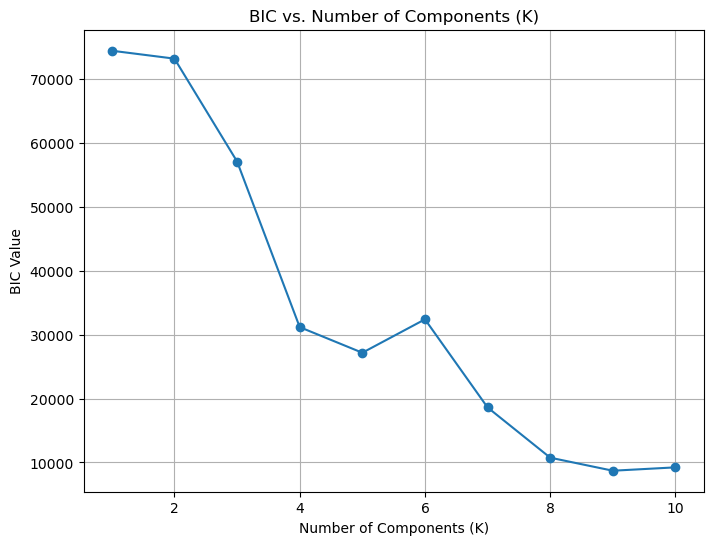

In [120]:
bestk, _ = bic_val(cdata, [i for i in range(1,11)], verbose=True)
model = GMM(n_components=bestk, covariance_type='full', random_state=42)
model.fit(cdata)
# getting clustering labels from GMM
labels = model.predict(cdata)
sub['cluster'] = labels

In [121]:
sub['censoring'] = sub['age_first_attempt'].isnull()
sub = sub.fillna(80)
print(sub)

      BDNF_valmet  COMT  HT1A  HT1B_161  HT1B_861  VHTTP_mutation_seule  \
0               2     1     0         2         2                     0   
1               2     0     2         1         2                     0   
2               2     1     1         0         2                     0   
3               0     0     2         0         2                     1   
4               1     2     0         1         2                     0   
...           ...   ...   ...       ...       ...                   ...   
2111            1     0     1         1         2                     0   
2112            2     1     0         1         2                     0   
2113            1     1     2         0         1                     0   
2114            2     0     0         0         2                     0   
2115            2     0     0         1         2                     1   

      VHTTP_LPR  @_httpb_promoteur  VHTTP_snippassocie  TPH1_promo  ...  \
0             2         

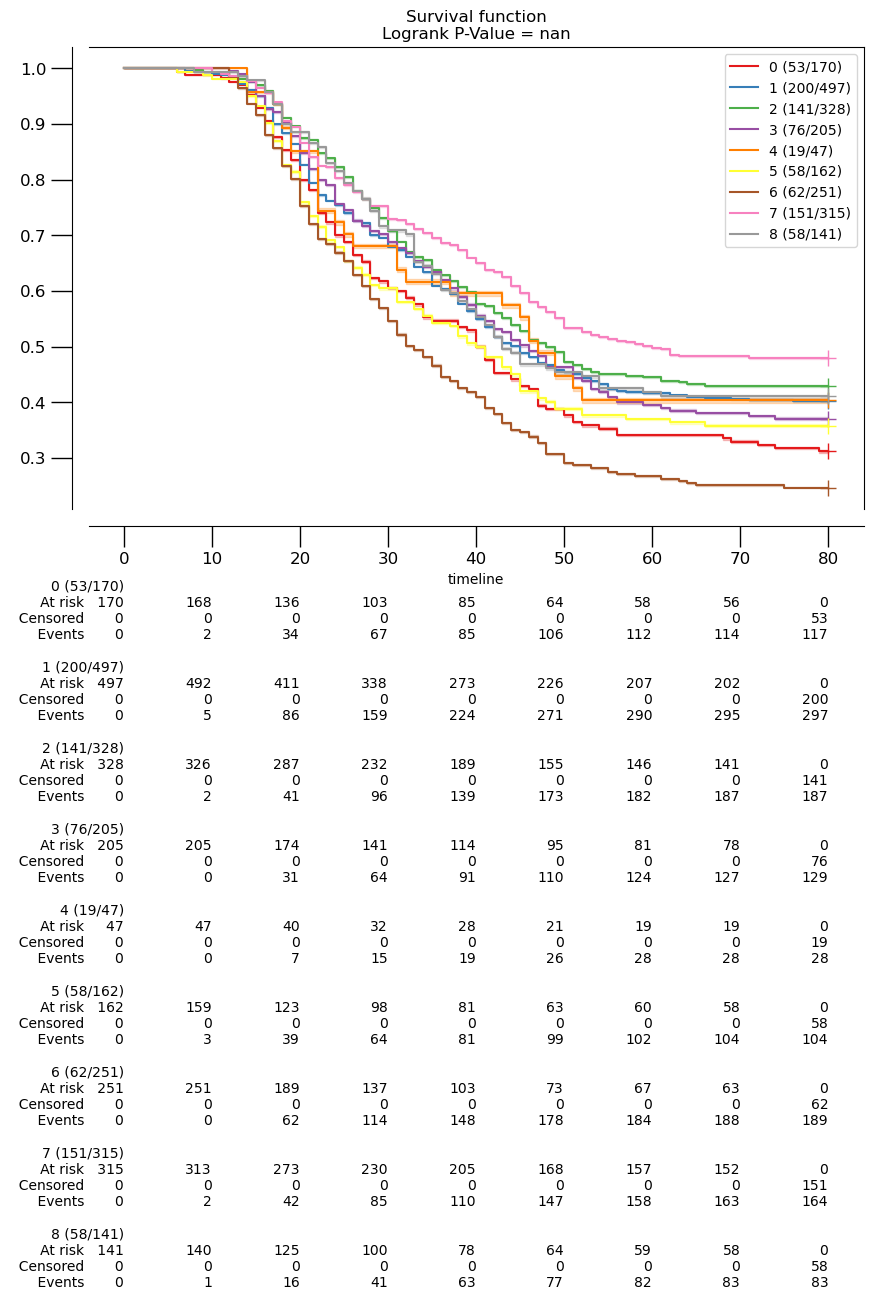

In [122]:
import kaplanmeier as km
# Compute Survival
results = km.fit(sub['age_first_attempt'],~sub['censoring'], sub['cluster'])

# Plot
km.plot(results)


In [115]:
print(sub[sub['cluster'] == 7])

KeyError: 'cluster'